<a href="https://colab.research.google.com/github/Annaseanna/Simulacion-de-sistemas/blob/main/Practica5_Simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 5- Simulación de Sistemas**
***Anna Ospina Bedoya***

Ejercicio 1. La circunferencia de los postes de una batería de níquel-cadmio sigue una distribución Weibull con parámetros: υ=3.25cm β=⅓ y α=0.005cm. Usando transformada inversa:




In [ ]:
# función que genera una observación Weibull con nu=0
# weibull con 2 parámetros w(escala,forma)
import random
import math 
import numpy as np
#Se crea una funcion que reciba como parametros alpha, beta y miu
def fweibull(a,b,nu):
  r=random.random()
  #Se aplica la formula de weibull
  obs=a*(-math.log(1-r))**(1/b)+nu
  return(obs)
#Numero de simulaciones
n=10000
#Se llamara la funcion y se guardaran los valores en la lista segun el # de observaciones
lista=[]
#Se agregara a la lista los valores obtenidos al llamar la funcion 
for i in range(n):
  lista.append(fweibull(0.005,1/3,3.25))




Encuentre la probabilidad de que un poste seleccionado aleatoriamente tenga una circunferencia mayor que 3.4cm.


In [ ]:
#Se agregan los postes que su circunferencia sea mayor a 4
x=[x for x in lista if x>3.4]
#La probabilidad es la longitud de la lista sobre el total de iteracciones
prob=len(x)/n
print(f'La probabilidad de que un poste seleccionado tenga una circunferencia mayor que 3.4 c.m es: {prob}')




La probabilidad de que un poste seleccionado tenga una circunferencia mayor que 3.4 c.m es: 0.0439



Un poste con circunferencia mayor que 3.5cm, no cabe en el orificio suministrado. Si el poste tiene una circunferencia menor que 3.3cm, no se ajusta suficientemente al orificio. ¿Qué proporción de los postes debe desecharse por tales razones?

In [ ]:
#Se agregan solo los elementos que sean menores a 3.3 y mayores a 3.5 (para desecharlos)
a=[x for x in lista if x<3.3 or x>3.5]
#Se saca la probabilidad y se multiplica *100 para obtener la proporcion
d=(len(a)/n)*100
print(f'Se debe desechar aproximadamente {d} postes porque no caben en el orificio suministrado') 

Se debe desechar aproximadamente 90.89 postes porque no caben en el orificio suministrado


Una ruta de correo consiste en 5 segmentos que se recorren en un tiempo distribuido de manera normal, con las siguientes medias y varianzas:

Plaza luces N(38,16)

Carabobo N(99,29)

Shanghai N(73,20)

La Cascada N(52,12)

Japón N (85,25)

Además de los tiempos mencionados, los carteros deben organizar el correo en la oficina central, actividad que tarda un tiempo distribuido cono N(90,25). El recorrido al punto inicial de la ruta requiere un tiempo distribuido como N(10,4). El regreso después del recorrido requiere un tiempo distribuido como N(15,4) y al regresar, se hacen labores administrativas que toman un tiempo distribuido como N(30,9).  Usando el método Box-Müller



In [ ]:
#Definimos la funcion de box muller que recibe como parametros 2 parametros miu y sigma
def boxmuller(u,d):
  #Sacamos la raiz cuadrada de d ya que necesitamos a la varianza
  desviacion=math.sqrt(d)
  #Generamos los dos numeros aleatorios
  u1=random.random()
  u2=random.random()
  #Aplicamos la formula
  x1=math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
  x2=math.sqrt(-2*math.log(u1))*math.sin(2*math.pi*u2)
  x1_1=u+desviacion*x1
  x2_2=u+desviacion*x2
  #Retornamos un tupla con x1' y x2'
  return x1_1,x2_2
#Ingresamos el numero de simulaciones a ejecutar
n=10000
def simulaciones(n):
  #Creamos una lista vacia donde vamos a almacenar los tiempos para x1 y x2
  tiempos=[]
  for i in range(n):
    lista=[]
    #inicializamos los valores por defecto
    tiempo_total1=0
    tiempo_total2=0
    #agregamos los valores e la practica y llamamos a la funcion
    lista.append(boxmuller(38,16))
    lista.append(boxmuller(99,16))
    lista.append(boxmuller(73,20))
    lista.append(boxmuller(52,12))
    lista.append(boxmuller(85,25))
    lista.append(boxmuller(90,25))
    lista.append(boxmuller(10,4))
    lista.append(boxmuller(15,4))
    lista.append(boxmuller(30,9))
    #accedemos a los valores de la tupla
    for j in lista:
      tiempo_total1+=j[0]
      tiempo_total2+=j[1]
    #agregamos en el total los valores obtenidos
    tiempos.append(tiempo_total1)
    tiempos.append(tiempo_total2)
    #como nuestro tiempo esta en minutos dividimos cada valor en 60 para obtener los valores en horas
  return [i/60 for i in tiempos]
#definimos el numero de simulaciones
a=simulaciones(10000)
#sumamos los valores y los dividimos en n*2
print(f'La duracion espererada de la jornada laboral en esta ruta es de {round((sum(a)/20000),2)}')

La duracion espererada de la jornada laboral en esta ruta es de 8.2




El tiempo que la jornada se extienda por encima de las 8 horas es tiempo extra. ¿Cuál es la probabilidad de que haya horas extra en esta ruta?

In [ ]:
observaciones=simulaciones(n)
#agregamos cada x a esa lista cuando x sea mayor a 8
lista=[x for x in observaciones if x>8]
#se toma la longitud de la lista y se divide sobre la longitud del bloque llamado observaciones
print(f'La probabilidad de que haya horas extra en esta ruta es {len(lista)/len(observaciones)}')

La probabilidad de que haya horas extra en esta ruta es 0.8524


¿Cuál es la probabilidad de que una persona que reparta correo en la ruta trabaje horas extra en dos o  más días de una semana de seis días?

In [ ]:
def semanas(semana):
  #se define un contador
  count=0
  semanas=[]
  #se guardaran 6 dias de simulacion en cada iteracion
  for i in range(semana):
    semanas.append(simulaciones(3))
  for i in semanas:
    #para cada x en la lista de semana se preguntara si es mayor a 8
    x=[x for x in i if x>8]
    #si la longitud de esta lista es mayor a o igual a 2 es porque ha laborado dos o mas dias
    if len(x)>=2:
      #se aumenta el contador en 1 unidad
      count+=1
  #se retorna el contador dividido el numero de simulaciones
  return count/semana
print(f'La probabilidad de que un trabajador tenga horas extras en 2 o mas dias por semana es de {semanas(10000)}')

La probabilidad de que un trabajador tenga horas extras en 2 o mas dias por semana es de 0.9996


¿Cuál es la probabilidad de que la ruta se termine dentro de 8h±24min?

In [ ]:
#si el tiempo esta entre 7.6 y 8.4 se agrega a x
x=[x for x in observaciones if x<=8.4 and x>=7.6]
#se divide la longitud de x sobre el numero de simulaciones
print(f'La probabilidad de que acabe la ruta en 8h±24min es de {len(x)/len(observaciones)}')

La probabilidad de que acabe la ruta en 8h±24min es de 0.84915


Ejercicio 3. 

Generar N=10000 observaciones aleatorias usando la siguiente función de densidad de probabilidad y el método de aceptación-rechazo.  
$f(x)=\frac{1}{32}(8-x^3), -2\leq x \leq 2$

$(a,b)=(-2,2)$

$g(x)=\frac{1}{32}(8-x^3)=x^2$
Graficar las observaciones aceptadas y rechazadas. 

 Para cada ejercicio:

Crear funciones de python que generen observaciones con las distribuciones y métodos planteados.

Resolver los problemas con base en al menos 10000 iteraciones.

r1: 0.40499161397212213 r2: 0.8232323955292228
x= -0.38003354411151147 no es observación
r1: 0.7647489274302347 r2: 0.7659493234175337
x= 1.0589957097209388 no es observación
r1: 0.44599632405484 r2: 0.46147780518498205
x= -0.21601470378063992 es observación


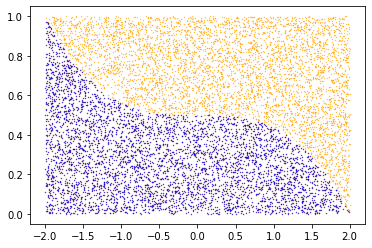

In [ ]:
import random 
import matplotlib.pyplot as plt
import numpy as np

# esta función implementa el método aceptación-rechazo para el ejemplo anterior

def ar():
    #generar r1, r2
    r1 = random.random()
    r2 = random.random()
    # calcular x en (a=-2, b=2)
    x= -2 + 4*r1
    # evaluar gx(x)
    gx = 0.5-(math.pow(x,3)/16)
    print('r1:',r1,'r2:',r2) 
    while r2 > gx:
      # si no se cumple la condición, rechazar
      print('x=',x,'no es observación')
      r1 = random.random()
      r2 = random.random()
      print('r1:',r1,'r2:',r2) 
      x= -2 + 4*r1
      gx = 0.5-(math.pow(x,3)/16)
    
    resu=x
    return x
x=ar()
print('x=',x,'es observación')
# esta es la misma función g(x) = f(x)/M = 3*x^2/3
def g(x):
  resu= 0.5-((x*x*x)/16)
  return resu

# esta función calcula x con base en r aleatorio
def equis(r):
  resu=-2 + 4*r1
  return resu

# La función de Numpy random.uniform(low=0.0, high=1.0, size=None)
# genera una muestra de size números uniformes entre low y high.
# con random.uniform se toman muestras r1 y r2 de tamaño N=10000 
r1=np.random.uniform(0,1,10000)
# la función equis(x) permite calcular el valor de x 
x1=equis(r1)
r2=np.random.uniform(0,1,10000)
# estos son los aceptados
aceptados=r2<=g(x1)

# graficar los pares
plt.scatter(x1,r2,s=0.1,c='orange')

# graficar los aceptados
plt.scatter(x1[aceptados],r2[aceptados],s=0.1,c='blue')
plt.show()